As a Canadian I felt committed to cheering on the Toronto Raptors during the NBA finals. To further show my national pride, I decided to do a network analysis of passes made by players on the Toronto Raptors during the NBA finals against the Golden State Warriors. Futher motivation for this post is that I am trying learn about network analysis. A coworker had inspired me because they showed me a fancy looking graph. This post does not employ any type of predictive analysis. It simply visualizes the relationships between the players on the Raptors via pass frequency. I may do more complex network analysis in the future.

To do network analysis on the TOR vs GSW finals I make use of the *__networkx__* package. Before doing any analysis, I needed to gather data on all the games played from the NBA API. Unfortunately, the NBA doesn't have an official API. However, there is an [unofficial API](https://github.com/swar/nba_api) thanks to [Swar Patel](https://github.com/swar).*** 


\***Side note: as per usual, 90% of my time was spent collecting data, while 10% was spent on actual analysis 💀. Part of this could have been avoided if I had known there was an unofficial API. Before I realized there was an API, I was trying to scrape the NBA website myself. There is a very hacky way of getting data from tables and charts on websites that don't have an official API, which I may write about in a future post.


## Data
The unofficial NBA API is very easy to use. The documentation is straight forward and there are also some examples provided. I discovered that it pulls data directly from [the NBA website](https://stats.nba.com) through repeated requests. An example of the official NBA stats page is provided below. It shows the [passes made by Kawhi Leonard](https://stats.nba.com/player/202695/passes-dash/?Season=2018-19&SeasonType=Playoffs&OpponentTeamID=1610612744&PerMode=Totals) during the finals against Golden State. Fortunately, the API provides data frames in this exact format. The fields of interest are `PASS TO` and `PASS`, which counts the total number of passes made to each player. You can also get the passes per game.

<img src="images/nba_stats_example.PNG" width="1000">

The steps I completed to get the data in its final CSV form for analysis are as follows:

1. Get team IDs for Raptors and Golden State
    - use the static part of the API to access team information
2. Get all the players on Raptors
    - use the CommonTeamRoster endpoint
3. For each player, get their passes received and passes made
    - use the PlayerDashPtPass endpoint
4. Create dataframe with all passes
    - use the `append()` and `concat()` methods in  pandas
5. Export to CSV file
    - use `to_csv()` method

## Network Analysis
What the heck is it? I don't really know since I am in the process of learning about network analysis. However, I do know that it involves making these types of fancy graphs:

<img src="images/network_diagram_example.png" width="500">

In all seriousness, though, network analysis could be as simple as producing the graph above in order to show the relationships between individual actors. It could also be as complicated as applying complex algorithms to these relationships and actors to measure various characteristics of networks. For now, I will keep it simple and plot the relationships (passes) between Toronto Raptors players (actors).

## Toronto Raptors network of passes

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

In [6]:
passes_received = pd.read_csv('tor_passes_received.csv')

Here is what the data frame looks like. You'll notice it looks exactly like the table on the NBA website, except I decided to just pull passes received instead of passes made. The two are symmetric so it doesn't matter which one you use.

In [7]:
passes_received.head()

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,TEAM_NAME,TEAM_ID,TEAM_ABBREVIATION,PASS_TYPE,G,PASS_FROM,PASS_TEAMMATE_PLAYER_ID,FREQUENCY,...,AST,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT
0,1627775,"McCaw, Patrick",Toronto Raptors,1610612761,TOR,received,4,"Siakam, Pascal",1627783,0.077,...,0,0,0,0.0,0,0,0.0,0,0,0.0
1,1627775,"McCaw, Patrick",Toronto Raptors,1610612761,TOR,received,4,"Leonard, Kawhi",202695,0.538,...,1,1,1,1.0,0,0,0.0,1,1,1.0
2,1627775,"McCaw, Patrick",Toronto Raptors,1610612761,TOR,received,4,"Green, Danny",201980,0.154,...,0,0,0,0.0,0,0,0.0,0,0,0.0
3,1627775,"McCaw, Patrick",Toronto Raptors,1610612761,TOR,received,4,"Ibaka, Serge",201586,0.077,...,0,0,0,0.0,0,0,0.0,0,0,0.0
4,1627775,"McCaw, Patrick",Toronto Raptors,1610612761,TOR,received,4,"Gasol, Marc",201188,0.077,...,0,0,0,0.0,0,0,0.0,0,0,0.0


I only need the columns of the receiver, passer and the number of passes. These are `PLAYER_NAME_LAST_FIRST`, `PASS_FROM` and `PASS`.

In [8]:
passes_received = pd.read_csv('tor_passes_received.csv')[['PLAYER_NAME_LAST_FIRST', 'PASS_FROM', 'PASS']]

### Basic graph

This is the most basic form of a network graph. It simply plots the instance of a link (edge) between each node. That is, if a player has passed to another player in the finals, there will be a line connecting them. This isn't very interesting. What if we want to see where the passes are concentrated?

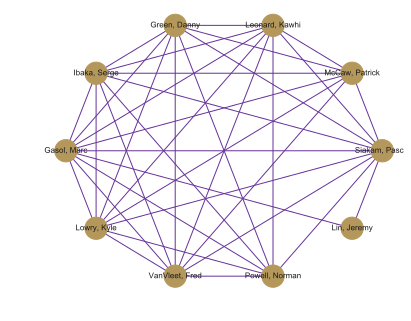

In [12]:
import networkx as nx

G=nx.from_pandas_edgelist(passes_received, 'PASS_FROM', 'PLAYER_NAME_LAST_FIRST')
pos = nx.circular_layout(G)
edges = G.edges()
plt.figure(figsize=(5,4)) 
nx.draw(G, pos, edges=edges, node_color='#b4975a', edge_color='rebeccapurple', node_size=500)
nx.draw_networkx_labels(G,pos=pos, font_size=8)
%config InlineBackend.figure_format = 'svg'

### Graph with edge widths determined by number of passes

We can see where the passes are concentrated by applying different line thicknesses to the edges. This can be done by using the `width` argument in the `draw_networkx_edges` networkx method.

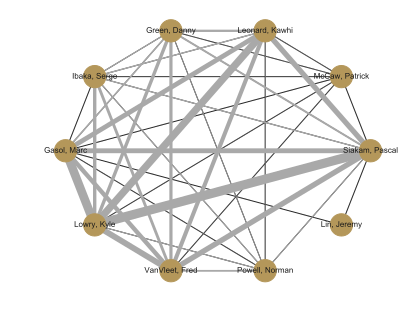

In [13]:
G=nx.from_pandas_edgelist(passes_received, 'PASS_FROM', 'PLAYER_NAME_LAST_FIRST', edge_attr='PASS')
passes = [i['PASS'] / 10 for i in dict(G.edges).values()]

pos = nx.circular_layout(G)
plt.figure(figsize=(5,4)) 
nx.draw(G, pos)
nx.draw_networkx_nodes(G, pos, node_color='#b4975a', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='darkgrey', width=passes)
nx.draw_networkx_labels(G,pos=pos, font_size=8)
%config InlineBackend.figure_format = 'svg'

### Directed graph with edge colours determined by number of passes

Another way to see where the passes are concentrated is by colouring the lines from dark to light. Dark represents a higher number of passes. I have also added a visual for the direction of the pass by using a directed graph. The direction is shown by the arrows.  

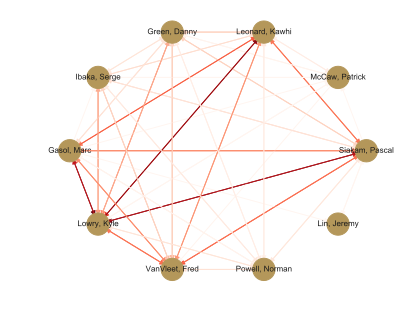

In [14]:
G=nx.from_pandas_edgelist(passes_received, 'PASS_FROM', 'PLAYER_NAME_LAST_FIRST', edge_attr='PASS', create_using=nx.DiGraph())
passes = [i['PASS'] / 10 for i in dict(G.edges).values()]

pos = nx.circular_layout(G)
plt.figure(figsize=(5,4)) 
nx.draw(G, pos, edge_color=passes, edge_cmap=plt.cm.Reds)
nx.draw_networkx_nodes(G, pos, node_color='#b4975a', node_size=500) # gold  #b4975a red #ce1141 grey #a1a1a4
nx.draw_networkx_labels(G,pos=pos, font_size=8)
%config InlineBackend.figure_format = 'svg'

# Future Analysis

I have some other ideas about how I want to use the NBA data for network analysis. For example, I might want to predict number of points or wins using the network of passes. I also have some ideas about how to use the NBA data in general:

1. A [Gantt chart](https://plot.ly/python/gantt/) of team founding dates 
2. A [shot chart](http://savvastjortjoglou.com/nba-shot-sharts.html) (but this one involves a lot of drawing on plots)
3. A [filled chord diagram](https://plot.ly/python/v3/filled-chord-diagram/) or an [interactive chord diagram](https://plot.ly/python/v3/chord-diagram/) (this is another way to visualize relationships)